## Importing Library

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
import yfinance as yf
import datetime as dt
import seaborn as sns

In [2]:
# import ipywidgets as widgets
# from ipywidgets import interact, interact_manual

In [3]:
rf=pd.read_csv('C:/Users/Sameer Kataria/Desktop/New folder/RF_total.csv', parse_dates=["Date"])

### NIFTY50 Ticker Import

In [4]:

Tickers_nifty = pd.read_csv("C:/Users/Sameer Kataria/Desktop/New folder/nifty50_tickers.csv")
ticker_list = Tickers_nifty['Ticker'].to_list()
ticker_list = [s + '.NS' for s in ticker_list]

In [5]:
def get_ticker_data(start_date, end_date):
    df = yf.download(" ".join(ticker_list), start = start_date, end = end_date, interval="1d")["Adj Close"]
    df_index = yf.download("^NSEI", start=start_date, end=end_date, interval="1d")["Adj Close"]
    
    return df, df_index

In [6]:
df, df_index = get_ticker_data("2010-01-01", "2022-03-31")
df

[*********************100%***********************]  50 of 50 completed
[*********************100%***********************]  1 of 1 completed


,ADANIPORTS.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,BPCL.NS,BRITANNIA.NS,CIPLA.NS,...,SUNPHARMA.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,UPL.NS,WIPRO.NS
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,104.207397,161.931595,181.382095,639.059998,347.893158,30.862942,281.826416,61.948414,142.882523,318.082855,...,139.610626,79.272247,153.140762,458.091919,299.222412,210.172516,65.893394,922.355286,100.624138,138.167908
2010-01-05,107.801079,162.443085,185.166611,642.011719,348.667389,30.656048,286.289581,61.015507,143.096634,312.381744,...,143.806320,85.418617,150.472473,469.187347,299.301941,212.863815,67.244621,941.449585,105.558693,140.348557
2010-01-06,113.144814,161.954208,182.058578,632.086670,340.440735,31.096819,283.256378,60.096855,141.795029,325.009033,...,145.672607,86.754776,150.704102,464.091431,292.534607,213.911591,68.327011,942.595276,103.682991,137.510712
2010-01-07,111.806557,160.301971,183.347488,620.999329,337.779114,30.907907,285.466309,58.930721,141.212692,322.323334,...,143.454330,87.059601,145.552765,469.693359,284.393646,209.206879,70.025932,934.050598,102.701843,135.071182
2010-01-08,111.675522,162.950058,185.742508,610.723816,338.746948,31.470121,281.696564,59.930271,141.525269,321.428131,...,145.871735,87.493851,146.349579,468.717438,278.581543,214.712875,69.379272,945.459473,102.066994,133.039902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-25,743.250000,3046.949951,721.250000,3654.350098,16333.299805,6973.500000,709.349976,360.299988,3094.500000,1013.500000,...,902.349976,733.349976,432.100006,1338.949951,3707.449951,1530.550049,2523.899902,6312.700195,798.549988,603.349976
2022-03-28,737.000000,3027.449951,736.000000,3687.750000,16518.949219,7001.399902,733.049988,359.700012,3094.800049,1017.099976,...,905.900024,741.250000,432.700012,1338.949951,3707.699951,1524.449951,2535.899902,6359.950195,780.750000,600.200012
2022-03-29,761.950012,3042.600098,737.799988,3689.100098,16501.699219,7039.350098,754.950012,358.450012,3103.800049,1038.849976,...,919.349976,743.200012,433.700012,1334.650024,3705.350098,1522.349976,2538.800049,6526.600098,782.000000,602.500000


In [7]:
## Creating a function to generates the top 5 performing stocks from NIFTY50 till date

def top_5_stocks(data):
    list_returns=[]
    for stock in data.columns:
        list_returns.append([stock,(data[stock][-1]-data[stock][0])/data[stock][0]])
    list_returns = [[tick,item] for tick,item in list_returns if str(item) != 'nan'] 
    df = sorted(list_returns, key = lambda x: x[1], reverse=True)
    df=df[:5]
    df=[tick for tick, item in df]
    return df

In [8]:
## Visualize the return distribution of the stocks from NIFTY50 over the period

def distribution_function(tickers, data):
    for ticker in tickers:
        plt.figure(figsize=(8,6))
        sns.histplot(data[ticker].pct_change(), bins=10, color="red")
        plt.axvline(data[ticker].pct_change().mean(), color='black', linestyle='dashed', linewidth=1)
        plt.axvline(data[ticker].pct_change().median(), color='yellow', linestyle='dashed', linewidth=1)
        ax=plt.gca()
        plt.text(0.8, 0.8, 'Mean: {}'.format(round(data[ticker].pct_change().mean(),3)), fontsize = 11.5, transform=ax.transAxes )
        plt.text(0.8, 0.75, 'Median: {}'.format(round(data[ticker].pct_change().median(),3)), fontsize = 11.5, transform=ax.transAxes)
        plt.title("Monthly Returns distribution of {}".format(ticker))
        plt.xlabel("")
        plt.show()     

In [9]:
## Compute the cummulative returns for the stock

def cumreturn_function(tickers,data):
    for ticker in tickers:
        plt.figure(figsize=(8,6))
        sns.lineplot(data=(1+data[ticker].pct_change()).cumprod(), color="red")
        plt.title("Cumilative returns of {}".format(ticker))
        plt.ylabel(" ")
        plt.show()

In [10]:
df_1=df.resample("M").last()

## Return Distribution

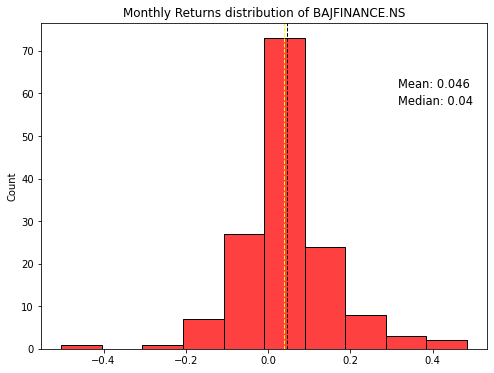

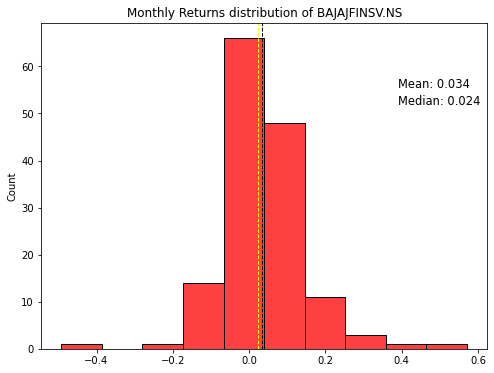

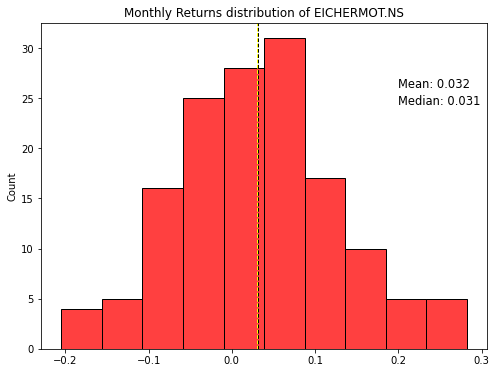

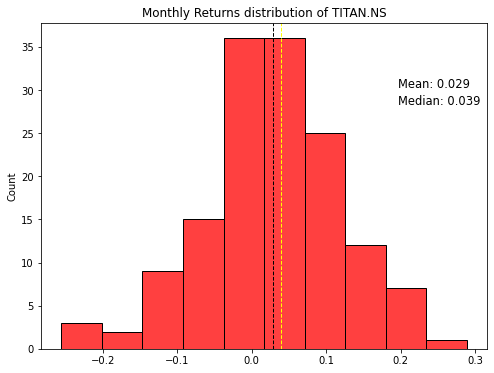

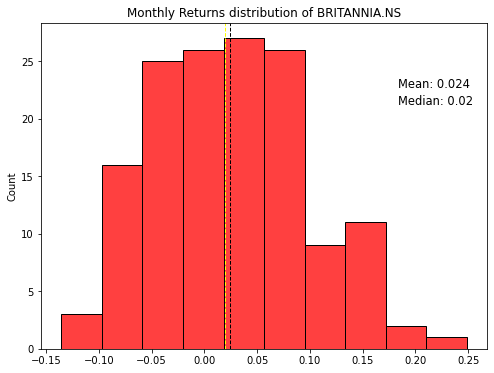

In [11]:
distribution_function(top_5_stocks(df_1),df_1)

## Cummulative Return

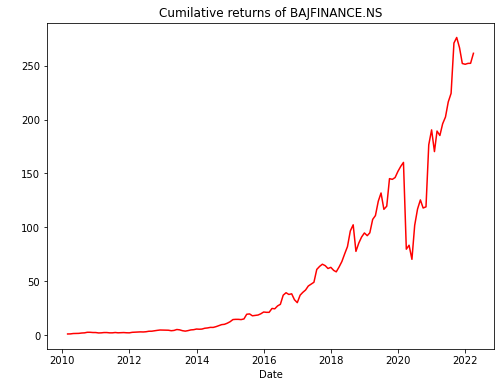

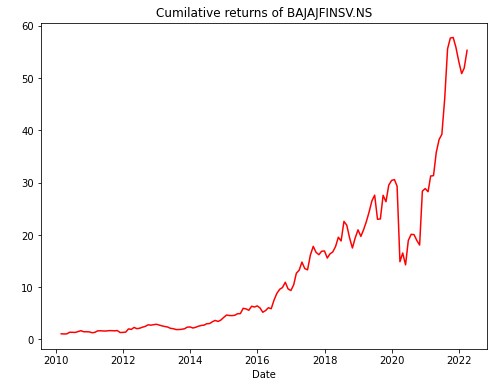

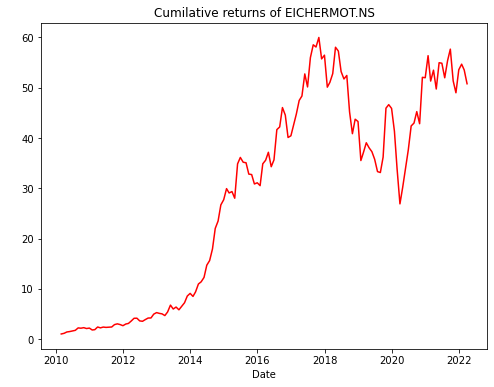

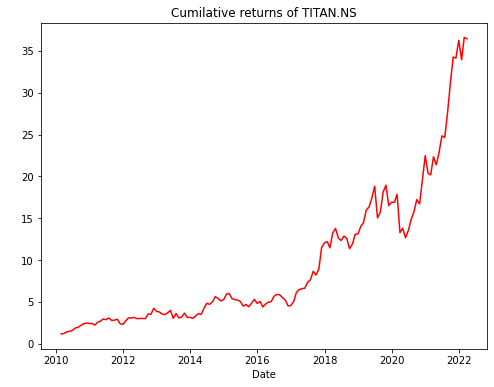

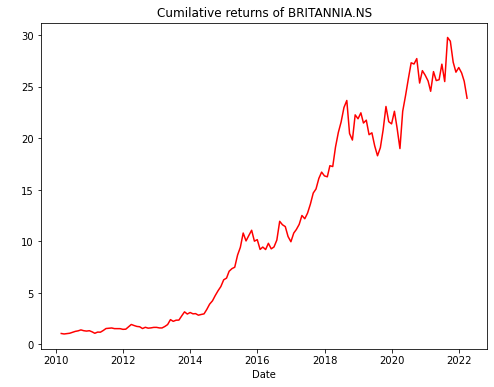

In [12]:
cumreturn_function(top_5_stocks(df_1),df_1)

In [13]:
## Function to implement Momentum strategy and return the top recommendations for investment

def reb_stock_list(date, df):
    #Please enter date in end of month format
    #For stocks to invest in December enter date as end of November(2021-11-30)
    date_1 = date.split('-')
    y = int(date_1[0])
    m = int(date_1[1])
    d = int(date_1[2])
    reb_date = dt.datetime(y,m,d)
    stocks = df[df["Date"]==reb_date]["Ticker"].to_list()
    return stocks

def month_wise_12m_investing(df, month_number):
    temp_1 = df.reset_index()
    temp_1["month"] = temp_1["Date"].dt.month
    month = temp_1[temp_1["month"]==9]
    month["ret12"]=(1+month["RET_RollProd_Forward_12"]).cumprod()
    plt.plot(month["Date"], month["ret12"])

def momentum_unleash(df, period, qcut, rebalance_date):
    ## Resample by period
    df = df.resample(period, label="left").last()
    
    if period == 'M':
        roll = 6
    elif period == '3M':
        roll = 4
    elif period == '6M':
        roll = 2
    elif period == '12M':
        roll = 1
    
    ## Data preparation
    daily_data=pd.melt(df, ignore_index=False)
    daily_data=daily_data.reset_index()
    daily_data.rename(columns={"value":"Adj Close", "variable":"Ticker"}, inplace=True) # Rename columns
    daily_data["Return"]=daily_data.groupby("Ticker")["Adj Close"].pct_change() # Create return column
    
    #######################
    ## Momentum Strategy ##
    #######################
    
    ## Computing Rolling Product of returns
    daily_data['RET_plus_1'] = daily_data['Return']+1 #Adding 1 to each returns for calculating the rolling period returns

    ## Calculating the cummulative historical period returns on rolling-basis (i.e. stock’s return over the months T-12 to T-1)
    daily_data['RET_RollProd_Past_12m'] = (daily_data.groupby('Ticker')['RET_plus_1'].shift(1).rolling(roll).apply(lambda x : x.prod()))-1
    
    ## Calculating the cummulative future period returns on rolling-basis (i.e.,  compound return over the next 'X' months, where X=1, 3, 6, 12 and 60)
    daily_data['RET_RollProd_Forward_1'] = (daily_data.groupby('Ticker')['RET_plus_1'].shift(0).rolling(1).apply(lambda x : x.prod()))-1
    daily_data['RET_RollProd_Forward_3'] = (daily_data.groupby('Ticker')['RET_plus_1'].shift(-2).rolling(3).apply(lambda x : x.prod()))-1
    daily_data['RET_RollProd_Forward_6'] = (daily_data.groupby('Ticker')['RET_plus_1'].shift(-5).rolling(6).apply(lambda x : x.prod()))-1
    daily_data['RET_RollProd_Forward_12'] = (daily_data.groupby('Ticker')['RET_plus_1'].shift(-11).rolling(12).apply(lambda x : x.prod()))-1
    # daily_data['RET_RollProd_Forward_60'] = (daily_data.groupby('Ticker')['RET_plus_1'].shift(-60).rolling(60).apply(lambda x : x.prod()))-1

    daily_data.dropna(subset=["RET_RollProd_Past_12m"], inplace=True) # compute 12 month return rolling product
    daily_data.reset_index(drop=True, inplace=True)
    
    ## Top, Bottom and Neither Deciles for all the stocks in a month
    daily_data['Deciles'] = daily_data.groupby('Date')['RET_RollProd_Past_12m'].transform(lambda x: pd.qcut(x, qcut, duplicates='drop', labels=False))
    daily_data.loc[daily_data['Deciles']==(qcut-1), 'Rank_Deciles'] = 'UP'
    daily_data.loc[daily_data['Deciles']==0, 'Rank_Deciles'] = 'DOWN'
    daily_data.loc[((daily_data['Deciles']>=1) & (daily_data['Deciles']<=(qcut-2))), 'Rank_Deciles'] = 'Neither'

    ## Seperating UP decile companies into separate dataframes
    daily_data_UP = daily_data[daily_data['Rank_Deciles']=='UP']
    
    ## Create equal weighted portfolio return from UP protfolio
    Eq_wtd_port_up = daily_data_UP.sort_values(['Date']).groupby('Date')[[ 'RET_RollProd_Forward_1', 'RET_RollProd_Forward_3', 'RET_RollProd_Forward_6', 'RET_RollProd_Forward_12']].agg('mean')
    
    ## Cummulative returns of momentum based portfolio
    Eq_wtd_port_up["ret_port"]=(1+Eq_wtd_port_up["RET_RollProd_Forward_1"]).cumprod()
    plt.plot(Eq_wtd_port_up.index, Eq_wtd_port_up["ret_port"], color='red') # Plot commulative returns till now
    plt.xlabel("year")
    plt.ylabel("cummulative returns")
    
    mean=Eq_wtd_port_up["RET_RollProd_Forward_1"].mean()*12
    stdev= Eq_wtd_port_up["RET_RollProd_Forward_1"].std()*np.sqrt(12)
    print("Sharpe Ratio from startdate to enddate is : {}".format(mean/stdev))
    print("Ann Return from startdate to enddateis : {}%".format(mean*100))
    
    ## Get Portfolio stocks for investment
    stocks = reb_stock_list(rebalance_date, daily_data_UP)
    
    print("\n Stock to Invest in for {}".format(rebalance_date)) 
    return stocks,Eq_wtd_port_up

In [20]:
period = str(input("Enter Period: ") or "M")
qcut = int(input("Enter qcut: ") or 5)
date = input("Enter Date to invest: ")

Enter Period: M
Enter qcut: 10
Enter Date to invest: 2022-03-31


Sharpe Ratio from startdate to enddate is : 1.0612855183981138
Ann Return from startdate to enddateis : 22.842140726954486%

 Stock to Invest in for 2022-03-31


[]

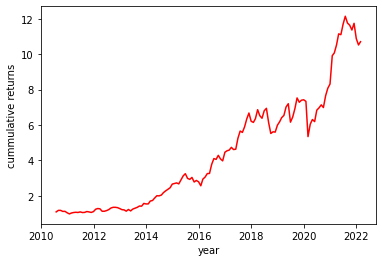

In [21]:
#momentum_unleash(df, 'M', 5, "2021-12-31")
stocks, portfolio = momentum_unleash(df, period, qcut, date)
# stocks, portfolio = momentum_unleash(df, "M", 5, "2020-1-31")
stocks

## Applying CAPM to calculate portfolio metrics

In [ ]:
portfolio.tail()

In [ ]:
portfolio["RET_RollProd_Forward_1"][50:].std()*np.sqrt(12)

In [ ]:
capm_portfolio=portfolio.reset_index()[["Date","RET_RollProd_Forward_1"]]
capm_portfolio.rename(columns={'RET_RollProd_Forward_1':"Return"}, inplace=True)

In [ ]:
df_index=df_index.resample("M").last().pct_change()

In [ ]:
df_index=pd.DataFrame(df_index).reset_index()
df_index.rename(columns={"Adj Close":"Return_idx"}, inplace=True)

In [ ]:
rf["Date"]=rf["Date"]+pd.offsets.MonthEnd(0)

In [ ]:
Capm_data=pd.merge(pd.merge(capm_portfolio, rf[["Date","ROI M"]], how="left", on="Date"), df_index, how="left", on="Date")
Capm_data.head()

In [ ]:
Capm_data["ROI M"]=Capm_data['ROI M'].ffill()
Capm_data.tail()

In [ ]:
Capm_data["RET_Exc"]=Capm_data["Return"]-Capm_data["ROI M"]
Capm_data["RET_idx_Exc"]=Capm_data["Return_idx"]-Capm_data["ROI M"]
Capm_data.head()

## Running Regression to compute Alpha and Beta

In [ ]:
reg_model=sm.ols(formula="RET_Exc ~ RET_idx_Exc", data=Capm_data).fit()

reg_model.summary()

In [ ]:
print('\033[1m' + "Alpha of the portfolio is {}%".format(round(reg_model.params["Intercept"]*100,4)))
print('\033[1m' + "Beta of the portfolio is {}".format(round(reg_model.params["RET_idx_Exc"],2)))

## Stock Recommendation

In [23]:
def stock_list(df,date,lookback_p, qcut):
    
    df=df.resample("M").last()

    daily_data=pd.melt(df, ignore_index=False)
    daily_data=daily_data.reset_index()
    daily_data.rename(columns={"value":"Adj Close", "variable":"Ticker"}, inplace=True) 
    daily_data["Return"]=daily_data.groupby("Ticker")["Adj Close"].pct_change() 


    daily_data['RET_plus_1'] = daily_data['Return']+1 


    daily_data['RET_RollProd_Past_12m'] = (daily_data.groupby('Ticker')['RET_plus_1'].shift(0).rolling(lookback_p).apply(lambda x : x.prod()))-1

    daily_data['Deciles'] = daily_data.groupby('Date')['RET_RollProd_Past_12m'].transform(lambda x: pd.qcut(x, qcut, duplicates='drop', labels=False))

    stocks=daily_data[(daily_data["Date"]==date) & (daily_data["Deciles"]==qcut-1)]
    
    return (stocks["Ticker"].values)

In [25]:
stock_list(df,"2022-03-31",6,10)

array(['HINDALCO.NS', 'ONGC.NS', 'POWERGRID.NS', 'TATAMOTORS.NS',
       'TITAN.NS'], dtype=object)